In [1]:
#Importing The Required Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading dataset
saledf=pd.read_csv("Advertising.csv")
saledf

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
saledf.shape

(200, 5)

In [5]:
#displaying the first 10 values in the data set
saledf.head(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [6]:
#displaying the last 7 values in the data set
saledf.tail(7)

,Unnamed: 0,TV,Radio,Newspaper,Sales
193,194,166.8,42.0,3.6,19.6
194,195,149.7,35.6,6.0,17.3
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [7]:
#Info of the dataset
saledf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
#Statistical summary of the dataset 
saledf.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [9]:
saledf.duplicated().sum()

0

In [10]:
saledf.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [11]:
saledf=saledf.drop("Unnamed: 0",axis=1)

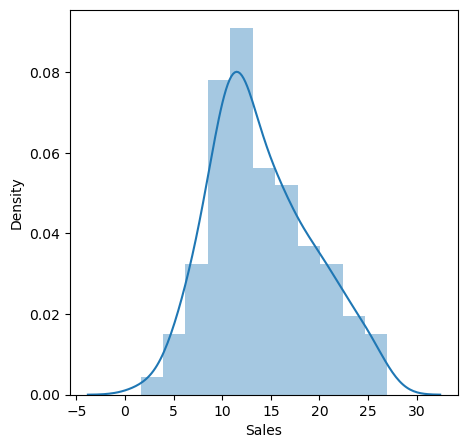

In [12]:
#Histogram construction for sales
plt.figure(figsize=(5,5))
sns.distplot(saledf['Sales'])
plt.show()

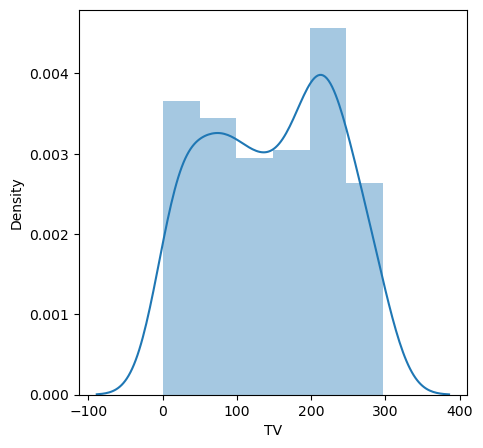

In [13]:
#Histogram construction for TV
plt.figure(figsize=(5,5))
sns.distplot(saledf['TV'])
plt.show()

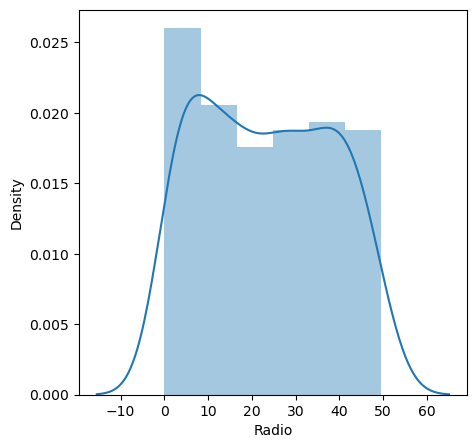

In [14]:
#Histogram construction for Radio
plt.figure(figsize=(5,5))
sns.distplot(saledf['Radio'])
plt.show()

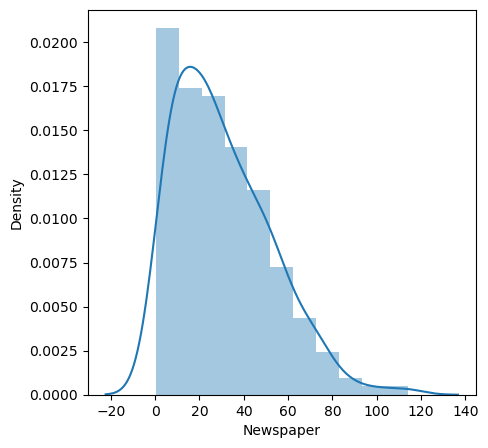

In [15]:
#Histogram construction for Newspaper
plt.figure(figsize=(5,5))
sns.distplot(saledf['Newspaper'])
plt.show()

Text(0, 0.5, 'Sales')

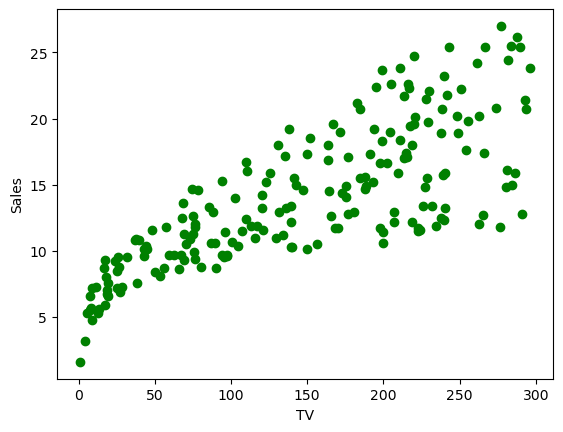

In [16]:
#TV scatter
plt.scatter(saledf["TV"],saledf["Sales"], color="green")
plt.xlabel("TV")
plt.ylabel("Sales")

Text(0, 0.5, 'Sales')

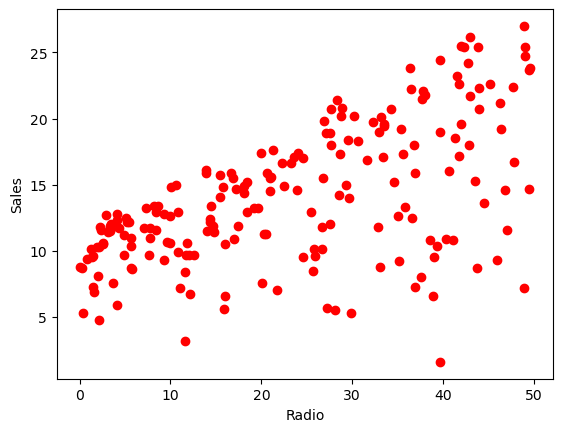

In [17]:
#Radio scatter
plt.scatter(saledf["Radio"],saledf["Sales"],color="red")
plt.xlabel("Radio")
plt.ylabel("Sales")

Text(0, 0.5, 'Sales')

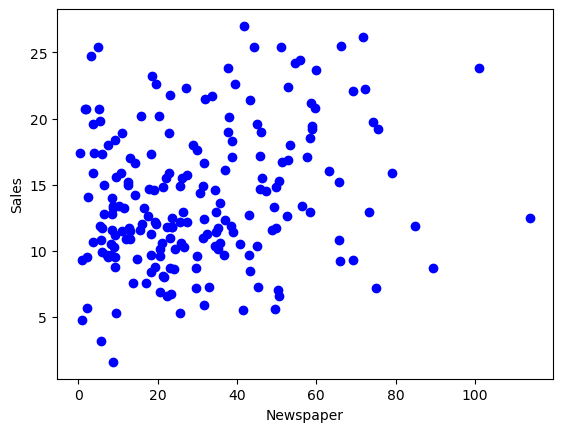

In [18]:
#Newspaper scatter
plt.scatter(saledf["Newspaper"],saledf["Sales"], color="blue")
plt.xlabel("Newspaper")
plt.ylabel("Sales")

In [19]:
X=saledf.iloc[:,:-1]
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [20]:
Y=saledf.iloc[:,-1]
Y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [22]:
# Creation of linear regression model
lr= LinearRegression()

In [24]:
# Train the model using the training sets
lr.fit(X_train,Y_train)

LinearRegression()

In [25]:
# Generating predicted values
Y_pred = lr.predict(X_test)
Y_pred

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [26]:
# calculating the coefficient
coefficient = lr.coef_
coefficient

array([0.04405928, 0.1992875 , 0.00688245])

In [27]:
#calculating the intercept
intercept = lr.intercept_
intercept

2.7089490925159083

In [28]:
X_new = np.array([[190.7,35.0,2.7],[80.5,7.3,180.1]])
#Prediction of the sales
prediction = lr.predict(X_new)
print("Sales Prediction: {}".format(prediction))

Sales Prediction: [18.10469898  8.95004958]


In [29]:
#accuracy of the model
accuracy=lr.score(X_train,Y_train)
print(accuracy*100,"%")

90.55159502227752 %


In [30]:
#Find the error between the actual values and the predicted values
print("Mean Absolute Error:",mean_absolute_error(Y_test,Y_pred))
print("Mean Squared Error:",mean_squared_error(Y_test,Y_pred))

Mean Absolute Error: 1.5116692224549084
Mean Squared Error: 3.7967972367152187
